# Numerical Modeling of Heat Transfer 

## Problem: 1D steady state heat conduction with heat production

The surface heat flow density $q_0$ at the area of interest is between $70-92\,mWm^{-2}$. 

The crustal thickness is 34 km and the crustal radioactive heat production $H = 1.6 \mu\,Wm^{-3}$.

1. Calculate the temperature at MOHO for minimum and maximum surface heat flow.
2. Calculate the mantle heat flow at MOHO for both temperatures calculated at 1.
3. Estimate the lithospheric thickness assuming base of lithosphere is defined by isotherm 1250 °C.

For conductivity use value $\lambda_{crust} = 2.5\,Wm^{-1}°C^{-1}$ for the crust and $\lambda_{mantle} = 1.8\,Wm^{-1}°C^{-1}$ for the lithospheric mantle.

## Solution

### Import libraries

In [4]:
from typing import NewType

import numpy as np
import matplotlib.pyplot as plt

### Setup the constants and type aliases

In [5]:
D_MOHO = 34_000 # (m) average MOHO depth 
T0 = 0          # (°C) average temperature at zero depth 
T_LITHOS = 1250 # (°C) 
H = 1.6e-6      # (W.m^3) crustal heat production in
q0_min = 70e-3
q0_max = 92e-3  # (W/m^2) heat flux range at zero depth 
λc = 2.5        # (W/m.°C) thermal conductivity for crust 
λm = 1.8        # thermal conductivity for upper (litospheric) mantle

Temperature = NewType("Temperature", float)

### 1. Calculate the temperature at MOHO for minimum and maximum surface heat flow.

In [11]:
def solve_steady_heat_1D_at_depth(d, q0, λ, T0, H) -> Temperature:
    """
    Calculate the temperature for the given 
    - depth d
    - initial heat flow density at x0
    - initital temperature T0 at depth 0
    - thermal conductivity λ
    - constant heat production H
    """
    # Using the equation 
    return abs(-(H/(2 * λc)) * (d ** 2) + ((H * d - q0) / λc) * d + T0)

T_MOHO_MIN = solve_steady_heat_1D_at_depth(D_MOHO, q0_min, λc, T0, H)
T_MOHO_MAX = solve_steady_heat_1D_at_depth(D_MOHO, q0_max, λc, T0, H)

print(f"Temperature range at MOHO: ({T_MOHO_MIN:.2f}, {T_MOHO_MAX:.2f})°C.")

Temperature range at MOHO: (582.08, 881.28)°C.


### Visualize the both geotherms (rotated).

Text(0.5, 1.0, 'Geotherms for Crust')

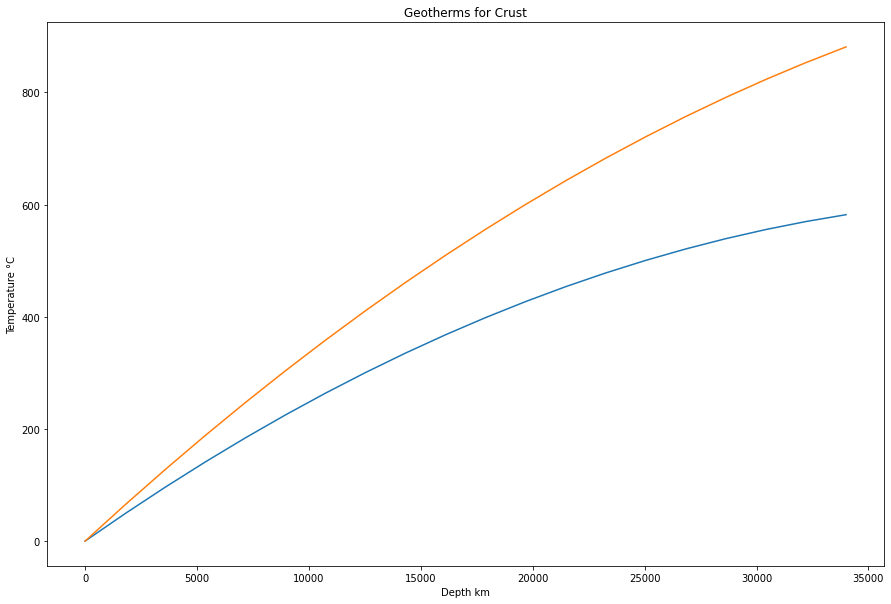

In [7]:

xs = np.linspace(0, 34_000, 20) # point per profile

ts_min, ts_max = [], [] # temperatures

for x in xs:
    ts_min.append(solve_steady_heat_1D_at_depth(x, q0_min, λc, T0, H))
    ts_max.append(solve_steady_heat_1D_at_depth(x, q0_max, λc, T0, H))

plt.figure(figsize=(15, 10))
plt.plot(xs, ts_min)
plt.plot(xs, ts_max)
plt.ylabel("Temperature °C")
plt.xlabel("Depth km")
plt.title(f'Geotherms for Crust')


### 2. Calculate the mantle heat flow at MOHO for both temperatures calculated at (1).

To calculate heat flux density we use the eq.

$$
T(x) = -\frac{H}{2\lambda}x^2 - \frac{q_0}{\lambda}x + T_0,
$$

$$
\therefore
$$

$$
\frac{dT}{dx} = -\frac{H}{\lambda}x - \frac{q_0}{\lambda},
$$

$$
\therefore
$$

$$
q(x) = -\lambda \frac{dT}{dx} = -\lambda \left( -\frac{Hx}{\lambda} - \frac{q_0}{\lambda} \right) = Hx + q_0.
$$

In [8]:
q_moho_min = (H * 34_000) + (-q0_min)
q_moho_max = (H * 34_000) + (-q0_max)

# print(q_moho_min, q_moho_max)

print(f"Heat flow range at MOHO: { abs( 1e3 * q_moho_min):.2f}, { abs(1e3 * q_moho_max):.2f} mW/m^2.")

Heat flow range at MOHO: 15.60, 37.60 mW/m^2.


### 3. Estimate the lithospheric thickness assuming base of lithosphere is defined by isotherm 1250 °C.

$$
T(x) = - \frac{q_0}{\lambda} x  + T_0  
$$
$$ 
\therefore
$$
$$
x = \frac{\lambda (T(x) - T_0)}{q_0}
$$

In [9]:
mantle_thickness_min = abs( λm * (T_LITHOS - T_MOHO_MIN) / q_moho_min )
mantle_thickness_max = abs( λm * (T_LITHOS - T_MOHO_MAX) / q_moho_max )

#print(mantle_thickness_min, mantle_thickness_max)

In [10]:
print(f"The litosphere thickness range: ({( (mantle_thickness_max + D_MOHO) /1000):.2f}, {( (mantle_thickness_min + D_MOHO) /1000):.2f}) km.") 

The litosphere thickness range: (51.65, 111.07) km.
